# 📥 Demonstration: Sum of normal variables squared

The $\chi^2$ distribution is supposed to result from the sum of the squares of Gaussian random variables. Here we test it numerically.

## Note on $\chi^2/\text{dof}$ for model assessment and comparison  $\newcommand{\pars}{\boldsymbol{\theta}}$

Many physicists learn to judge whether a fit of a model to data is good or to pick out the best fitting model among several by evaluating the $\chi^2/\text{dof}$ for a given model and comparing the result to one. Here $\chi^2$ is the sum of the squares of the residuals (data minus model predictions) divided by variance of the error at each point:

$$
  \chi^2 \equiv \sum_{i=1}^{N_{\text{data}}} \frac{\bigl(y_i - f(x_i;\hat\pars)\bigr)^2}{\sigma_i^2} ,
$$

where $y_i$ is the $i^{\text th}$ data point, $f(x_i;\hat\pars)$ is the prediction of the model for that point using the best fit for the parameters, $\hat\pars$, and $\sigma_i$ is the error bar for that data point. The degrees-of-freedom (dof), often denoted by $\nu$, is the number of data points minus number of fitted parameters:

$$
  \nu = N_{\text{data}} - N_{\text{fit parameters}} .
$$ 

The rule of thumb is generally that $\chi^2 \gg 1$ means a poor fit and $\chi^2 < 1$ indicates overfitting.
*Where does this come from and under what conditions is it a statistically valid thing to analyze fit models this way?*
(Note that in contrast to the Bayesian evidence, we are not assessing the model in general, but a particular fit to the model.)

Underlying this use of $\chi^2/\text{dof}$ is a particular, familiar statistical model

$$
    y_{\text expt} = y_{\text th} + \delta y_{\text expt} + \delta y_{\text th}
$$

in which the theory is $y_{{\text th},i} = f(x_i;\hat\pars)$, the experimental error is  *independent* Gaussian distributed noise with mean zero and standard deviation $\sigma_i$, that is $\delta y_{\text expt} \sim \mathcal{N}(0,\Sigma)$ with $\Sigma_{ij} = \sigma_i^2 \delta_{ij}$, and $\delta y_{\text th}$ is neglected (i.e., no model discrepancy is included). The prior is (usually implicitly) taken to be uniform, so

$$
     y_{\text expt} \sim \mathcal{N}\bigl(f(x_i;\hat\pars), \Sigma\bigr) .
$$ 

The likelihood (and the posterior, with a uniform prior) is then proportional to $e^{-\chi^2(\hat\pars)/2}$.

According to this model, each squared term in $\chi^2$ is drawn from a *standard* normal distribution. In this context, "standard" means that the distribution has mean zero and variance 1. This is exactly what happens when we take as the random variables $\bigl(y_i - f(x_i;\hat\pars)\bigr)/\sigma_i$.
But the sum of the squares of $k$ *independent* standard normal random variables has a known distribution, called the $\chi^2$ distribution with $k$ degrees of freedom. 
So the sum of the normalized residuals squared should be distributed (if you generated many sets of them) as a $\chi^2$ distribution. How many degrees of freedom? This should be the number of independent pieces of information. But we have found the fitted parameters $\hat\pars$ by minimizing $\chi^2$, i.e., by setting $\partial \chi^2(\pars)/\partial \theta_j$ for $j = 1,\ldots,N_{\text{fit parameters}}$, which means $N_{\text{fit parameters}}$ constraints. Therefore the number of dofs is given by $\nu = N_{\text{data}} - N_{\text{fit parameters}}$.

Now what do we do with this information? We only have one draw from the (supposed) $\chi^2$ distribution. But if that distribution is narrow, we should be close to the mean. The mean of a $\chi^2$ distribution with $k = \nu$ dofs is $\nu$, with variance $2\nu$. 
So if we've got a good fit (and our statistical model is valid), then $\chi^2/\nu$ should be close to one. If it is much larger, than the conditions are not satisfied, so the model doesn't work. If it is smaller, than the failure implies that the residuals are too small, meaning overfitting.

But we should expect fluctuations, i.e., we shouldn't always get the mean (or the mode, which is $\nu - 2$ for $\nu\geq 0$). If $\nu$ is large enough, then the distribution is approximately Gaussian and we can use the standard deviation / dof or $\sqrt{2\nu}/\nu = \sqrt{2/\nu}$ as an expected width around one.
One might use two or three times $\sigma$ as a range to consider.
If there are 1000 data points, then $\sigma \approx 0.045$, so $0.91 \leq \chi^2/\text{dof} \leq 1.09$ would be an acceptable range at the 95% confidence level ($2\sigma$). With fewer data points this range grows significantly.
**So in making the comparison of $\chi^2/\nu$ to one, be sure to take into account the width of the distribution, i.e., consider $\pm \sqrt{2/\nu}$ roughly.** For a small number of data points, do a better analysis!

What can go wrong? Lots! See
["Do's and Don'ts of reduced chi-squared"](https://arxiv.org/pdf/1012.3754.pdf) for a thorough discussion. But we've assumed that the data is Gaussian and independent, that data is dominated by experimental and not theoretical errors, and that the constraints from fitting are linearly independent. We've also assumed a lot of data and 
we've ignored informative (or, more precisely, non-uniform priors) priors.


## Test the sum of normal variables squared

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# sample tot_vals normal variables
tot_vals = 1000
x_norm_vals = stats.norm.rvs(size=tot_vals, random_state=None)

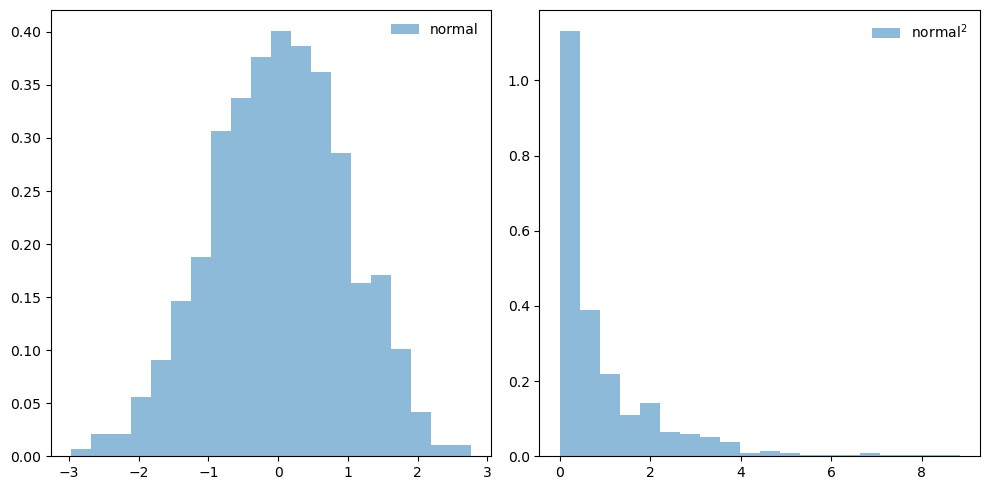

In [3]:
# plot a histogram of the normal variables and then their squares
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(x_norm_vals, bins=20, density=True, alpha=0.5, label='normal')
ax[0].legend(loc='best', frameon=False)

ax[1].hist(x_norm_vals**2, bins=20, density=True, alpha=0.5, label=r'${\rm normal}^2$')
ax[1].legend(loc='best', frameon=False)

fig.tight_layout()

In [4]:
def sum_norm_squares(num):
    """
    Return the sum of num random variables, with each the square of a random draw
    from a normal distribution
    """
    return np.sum(stats.norm.rvs(size=num, random_state=None)**2)

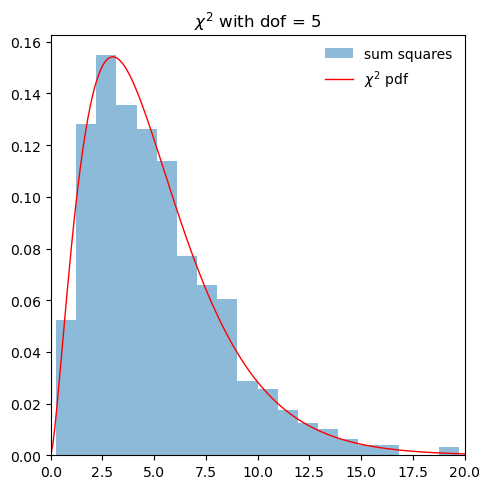

In [5]:
num = 5   # number of squared normal-distributed random variables to sum
tot_vals = 1000  # no. of trials
sum_xsq_vals = np.array([sum_norm_squares(num) for i in range(tot_vals)])

fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist(sum_xsq_vals, bins=20, density=True, alpha=0.5, label='sum squares')

x = np.linspace(0,100,1000)
dofs = num
ax.plot(x, stats.chi2.pdf(x, dofs),
       'r-', lw=1, alpha=1, label=r'$\chi^2$ pdf')

ax.set_xlim((0, max(20, 2*dofs)))
ax.legend(loc='best', frameon=False)

ax.set_title(fr'$\chi^2$ with dof = {dofs}')

fig.tight_layout()

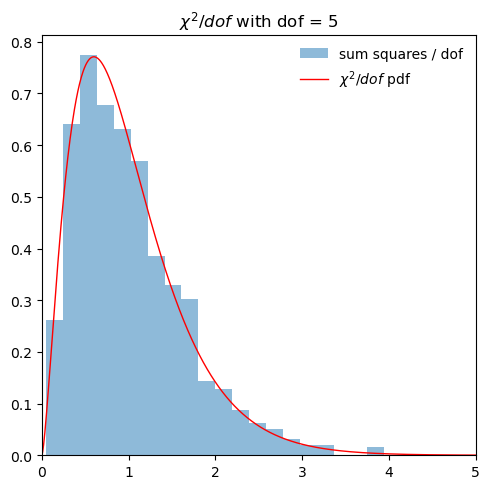

In [6]:
# Repeat but per dof
fig, ax = plt.subplots(1, 1, figsize=(5,5))

scaled_sum = sum_xsq_vals/num
ax.hist(scaled_sum, bins=20, density=True, alpha=0.5, 
        label='sum squares / dof')

dofs = num
x = np.linspace(0,5*dofs,1000)
ax.plot(x/dofs, dofs*stats.chi2.pdf(x, dofs),
       'r-', lw=1, alpha=1, label=r'$\chi^2/dof$ pdf')

ax.set_xlim((0, 5))
ax.legend(loc='best', frameon=False)

ax.set_title(fr'$\chi^2/dof$ with dof = {dofs}')
fig.tight_layout()